# ACT vs. SAT Participation Rates

In [293]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline



In [294]:
sat_csv_path = '../data/sat.csv'
sat = pd.read_csv(sat_csv_path)
sat

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


In [295]:
act_csv_path = '../data/act.csv'
act = pd.read_csv(act_csv_path)
act

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [296]:
sat.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


In [297]:
act.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [298]:
sat['Participation'] = sat.Participation.str.replace('%','').astype(float)

In [299]:
sat.Participation

0       5.0
1      38.0
2      30.0
3       3.0
4      53.0
5      11.0
6     100.0
7     100.0
8     100.0
9      83.0
10     61.0
11     55.0
12     93.0
13      9.0
14     63.0
15      2.0
16      4.0
17      4.0
18      4.0
19     95.0
20     69.0
21     76.0
22    100.0
23      3.0
24      2.0
25      3.0
26     10.0
27      3.0
28     26.0
29     96.0
30     70.0
31     11.0
32     67.0
33     49.0
34      2.0
35     12.0
36      7.0
37     43.0
38     65.0
39     71.0
40     50.0
41      3.0
42      5.0
43     62.0
44      3.0
45     60.0
46     65.0
47     64.0
48     14.0
49      3.0
50      3.0
Name: Participation, dtype: float64

In [300]:
act['Participation'] = act.Participation.str.replace('%','').astype(float)

In [301]:
act.Participation

0      60.0
1     100.0
2      65.0
3      62.0
4     100.0
5      31.0
6     100.0
7      31.0
8      18.0
9      32.0
10     73.0
11     55.0
12     90.0
13     38.0
14     93.0
15     35.0
16     67.0
17     73.0
18    100.0
19    100.0
20      8.0
21     28.0
22     29.0
23     29.0
24    100.0
25    100.0
26    100.0
27    100.0
28     84.0
29    100.0
30     18.0
31     34.0
32     66.0
33     31.0
34    100.0
35     98.0
36     75.0
37    100.0
38     40.0
39     23.0
40     21.0
41    100.0
42     80.0
43    100.0
44     45.0
45    100.0
46     29.0
47     29.0
48     29.0
49     69.0
50    100.0
51    100.0
Name: Participation, dtype: float64

In [302]:
sat.drop('Unnamed: 0', axis=1, inplace=True)

In [303]:
act.drop('Unnamed: 0', axis=1, inplace=True)

In [304]:
sat.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [305]:
act.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [306]:
sat['Evidence-Based Reading and Writing'] =sat['Evidence-Based Reading and Writing'].astype(float)
sat['Math'] =sat['Math'].astype(float)
sat['Total'] =sat['Total'].astype(float)

In [307]:
sat.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

##### Creating a dictionary for each column mapping the State to its respective value for that column. 

In [308]:
sat_english_dic = {}
for row in sat.values:
    #pull out every row from col 1 (which is the state column)
    state= row[0]
     #pull out every total from col 7 (which is the total column)
    english = row[2]
    sat_english_dic[state] = english
    """sets up the dict by calling the dict list, attributing state (col1) as the key
    and total as the data"""
print(sat_english_dic)

{'Alabama': 593.0, 'Alaska': 547.0, 'Arizona': 563.0, 'Arkansas': 614.0, 'California': 531.0, 'Colorado': 606.0, 'Connecticut': 530.0, 'Delaware': 503.0, 'District of Columbia': 482.0, 'Florida': 520.0, 'Georgia': 535.0, 'Hawaii': 544.0, 'Idaho': 513.0, 'Illinois': 559.0, 'Indiana': 542.0, 'Iowa': 641.0, 'Kansas': 632.0, 'Kentucky': 631.0, 'Louisiana': 611.0, 'Maine': 513.0, 'Maryland': 536.0, 'Massachusetts': 555.0, 'Michigan': 509.0, 'Minnesota': 644.0, 'Mississippi': 634.0, 'Missouri': 640.0, 'Montana': 605.0, 'Nebraska': 629.0, 'Nevada': 563.0, 'New Hampshire': 532.0, 'New Jersey': 530.0, 'New Mexico': 577.0, 'New York': 528.0, 'North Carolina': 546.0, 'North Dakota': 635.0, 'Ohio': 578.0, 'Oklahoma': 530.0, 'Oregon': 560.0, 'Pennsylvania': 540.0, 'Rhode Island': 539.0, 'South Carolina': 543.0, 'South Dakota': 612.0, 'Tennessee': 623.0, 'Texas': 513.0, 'Utah': 624.0, 'Vermont': 562.0, 'Virginia': 561.0, 'Washington': 541.0, 'West Virginia': 558.0, 'Wisconsin': 642.0, 'Wyoming': 626

In [309]:
sat_math_dic = {}
for row in sat.values:
    state= row[0]
    math = row[3]
    sat_math_dic[state] = math
print(sat_math_dic)

{'Alabama': 572.0, 'Alaska': 533.0, 'Arizona': 553.0, 'Arkansas': 594.0, 'California': 524.0, 'Colorado': 595.0, 'Connecticut': 512.0, 'Delaware': 492.0, 'District of Columbia': 468.0, 'Florida': 497.0, 'Georgia': 515.0, 'Hawaii': 541.0, 'Idaho': 493.0, 'Illinois': 556.0, 'Indiana': 532.0, 'Iowa': 635.0, 'Kansas': 628.0, 'Kentucky': 616.0, 'Louisiana': 586.0, 'Maine': 499.0, 'Maryland': 52.0, 'Massachusetts': 551.0, 'Michigan': 495.0, 'Minnesota': 651.0, 'Mississippi': 607.0, 'Missouri': 631.0, 'Montana': 591.0, 'Nebraska': 625.0, 'Nevada': 553.0, 'New Hampshire': 520.0, 'New Jersey': 526.0, 'New Mexico': 561.0, 'New York': 523.0, 'North Carolina': 535.0, 'North Dakota': 621.0, 'Ohio': 570.0, 'Oklahoma': 517.0, 'Oregon': 548.0, 'Pennsylvania': 531.0, 'Rhode Island': 524.0, 'South Carolina': 521.0, 'South Dakota': 603.0, 'Tennessee': 604.0, 'Texas': 507.0, 'Utah': 614.0, 'Vermont': 551.0, 'Virginia': 541.0, 'Washington': 534.0, 'West Virginia': 528.0, 'Wisconsin': 649.0, 'Wyoming': 604.

In [310]:
sat_total_dic = {}
for row in sat.values:
    state= row[0]
    total = row[4]
    sat_total_dic[state] = total
print(sat_total_dic)

{'Alabama': 1165.0, 'Alaska': 1080.0, 'Arizona': 1116.0, 'Arkansas': 1208.0, 'California': 1055.0, 'Colorado': 1201.0, 'Connecticut': 1041.0, 'Delaware': 996.0, 'District of Columbia': 950.0, 'Florida': 1017.0, 'Georgia': 1050.0, 'Hawaii': 1085.0, 'Idaho': 1005.0, 'Illinois': 1115.0, 'Indiana': 1074.0, 'Iowa': 1275.0, 'Kansas': 1260.0, 'Kentucky': 1247.0, 'Louisiana': 1198.0, 'Maine': 1012.0, 'Maryland': 1060.0, 'Massachusetts': 1107.0, 'Michigan': 1005.0, 'Minnesota': 1295.0, 'Mississippi': 1242.0, 'Missouri': 1271.0, 'Montana': 1196.0, 'Nebraska': 1253.0, 'Nevada': 1116.0, 'New Hampshire': 1052.0, 'New Jersey': 1056.0, 'New Mexico': 1138.0, 'New York': 1052.0, 'North Carolina': 1081.0, 'North Dakota': 1256.0, 'Ohio': 1149.0, 'Oklahoma': 1047.0, 'Oregon': 1108.0, 'Pennsylvania': 1071.0, 'Rhode Island': 1062.0, 'South Carolina': 1064.0, 'South Dakota': 1216.0, 'Tennessee': 1228.0, 'Texas': 1020.0, 'Utah': 1238.0, 'Vermont': 1114.0, 'Virginia': 1102.0, 'Washington': 1075.0, 'West Virgin

In [311]:
act.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [312]:
act_english_dic = {}
for row in act.values:
    state= row[0]
    english = row[2]
    act_english_dic[state] = english
print(act_english_dic)

{'National': 20.3, 'Alabama': 18.9, 'Alaska': 18.7, 'Arizona': 18.6, 'Arkansas': 18.9, 'California': 22.5, 'Colorado': 20.1, 'Connecticut': 25.5, 'Delaware': 24.1, 'District of Columbia': 24.4, 'Florida': 19.0, 'Georgia': 21.0, 'Hawaii': 17.8, 'Idaho': 21.9, 'Illinois': 21.0, 'Indiana': 22.0, 'Iowa': 21.2, 'Kansas': 21.1, 'Kentucky': 19.6, 'Louisiana': 19.4, 'Maine': 24.2, 'Maryland': 23.3, 'Massachusetts': 25.4, 'Michigan': 24.1, 'Minnesota': 20.4, 'Mississippi': 18.2, 'Missouri': 19.8, 'Montana': 19.0, 'Nebraska': 20.9, 'Nevada': 16.3, 'New Hampshire': 25.4, 'New Jersey': 23.8, 'New Mexico': 18.6, 'New York': 23.8, 'North Carolina': 17.8, 'North Dakota': 19.0, 'Ohio': 21.2, 'Oklahoma': 18.5, 'Oregon': 21.2, 'Pennsylvania': 23.4, 'Rhode Island': 24.0, 'South Carolina': 17.5, 'South Dakota': 20.7, 'Tennessee': 19.5, 'Texas': 19.5, 'Utah': 19.5, 'Vermont': 23.3, 'Virginia': 23.5, 'Washington': 20.9, 'West Virginia': 20.0, 'Wisconsin': 19.7, 'Wyoming': 19.4}


In [313]:
act_math_dic = {}
for row in act.values:
    state= row[0]
    math = row[3]
    act_math_dic[state] = math
print(act_math_dic)

{'National': 20.7, 'Alabama': 18.4, 'Alaska': 19.8, 'Arizona': 19.8, 'Arkansas': 19.0, 'California': 22.7, 'Colorado': 20.3, 'Connecticut': 24.6, 'Delaware': 23.4, 'District of Columbia': 23.5, 'Florida': 19.4, 'Georgia': 20.9, 'Hawaii': 19.2, 'Idaho': 21.8, 'Illinois': 21.2, 'Indiana': 22.4, 'Iowa': 21.3, 'Kansas': 21.3, 'Kentucky': 19.4, 'Louisiana': 18.8, 'Maine': 24.0, 'Maryland': 23.1, 'Massachusetts': 25.3, 'Michigan': 23.7, 'Minnesota': 21.5, 'Mississippi': 18.1, 'Missouri': 19.9, 'Montana': 20.2, 'Nebraska': 20.9, 'Nevada': 18.0, 'New Hampshire': 25.1, 'New Jersey': 23.8, 'New Mexico': 19.4, 'New York': 24.0, 'North Carolina': 19.3, 'North Dakota': 20.4, 'Ohio': 21.6, 'Oklahoma': 18.8, 'Oregon': 21.5, 'Pennsylvania': 23.4, 'Rhode Island': 23.3, 'South Carolina': 18.6, 'South Dakota': 21.5, 'Tennessee': 19.2, 'Texas': 20.7, 'Utah': 19.9, 'Vermont': 23.1, 'Virginia': 23.3, 'Washington': 21.9, 'West Virginia': 19.4, 'Wisconsin': 20.4, 'Wyoming': 19.8}


In [314]:
act_reading_dic = {}
for row in act.values:
    state= row[0]
    reading = row[4]
    act_reading_dic[state] = reading
print(act_reading_dic)

{'National': 21.4, 'Alabama': 19.7, 'Alaska': 20.4, 'Arizona': 20.1, 'Arkansas': 19.7, 'California': 23.1, 'Colorado': 21.2, 'Connecticut': 25.6, 'Delaware': 24.8, 'District of Columbia': 24.9, 'Florida': 21.0, 'Georgia': 22.0, 'Hawaii': 19.2, 'Idaho': 23.0, 'Illinois': 21.6, 'Indiana': 23.2, 'Iowa': 22.6, 'Kansas': 22.3, 'Kentucky': 20.5, 'Louisiana': 19.8, 'Maine': 24.8, 'Maryland': 24.2, 'Massachusetts': 25.9, 'Michigan': 24.5, 'Minnesota': 21.8, 'Mississippi': 18.8, 'Missouri': 20.8, 'Montana': 21.0, 'Nebraska': 21.9, 'Nevada': 18.1, 'New Hampshire': 26.0, 'New Jersey': 24.1, 'New Mexico': 20.4, 'New York': 24.6, 'North Carolina': 19.6, 'North Dakota': 20.5, 'Ohio': 22.5, 'Oklahoma': 20.1, 'Oregon': 22.4, 'Pennsylvania': 24.2, 'Rhode Island': 24.7, 'South Carolina': 19.1, 'South Dakota': 22.3, 'Tennessee': 20.1, 'Texas': 21.1, 'Utah': 20.8, 'Vermont': 24.4, 'Virginia': 24.6, 'Washington': 22.1, 'West Virginia': 21.2, 'Wisconsin': 20.6, 'Wyoming': 20.8}


In [315]:
act_science_dic = {}
for row in act.values:
    state= row[0]
    science = row[5]
    act_science_dic[state] = science
print(act_science_dic)

{'National': 21.0, 'Alabama': 19.4, 'Alaska': 19.9, 'Arizona': 19.8, 'Arkansas': 19.5, 'California': 22.2, 'Colorado': 20.9, 'Connecticut': 24.6, 'Delaware': 23.6, 'District of Columbia': 23.5, 'Florida': 19.4, 'Georgia': 21.3, 'Hawaii': 19.3, 'Idaho': 22.1, 'Illinois': 21.3, 'Indiana': 22.3, 'Iowa': 22.1, 'Kansas': 21.7, 'Kentucky': 20.1, 'Louisiana': 19.6, 'Maine': 23.7, 'Maryland': 2.3, 'Massachusetts': 24.7, 'Michigan': 23.8, 'Minnesota': 21.6, 'Mississippi': 18.8, 'Missouri': 20.5, 'Montana': 20.5, 'Nebraska': 21.5, 'Nevada': 18.2, 'New Hampshire': 24.9, 'New Jersey': 23.2, 'New Mexico': 20.0, 'New York': 23.9, 'North Carolina': 19.3, 'North Dakota': 20.6, 'Ohio': 22.0, 'Oklahoma': 19.6, 'Oregon': 21.7, 'Pennsylvania': 23.3, 'Rhode Island': 23.4, 'South Carolina': 18.9, 'South Dakota': 22.0, 'Tennessee': 19.9, 'Texas': 20.9, 'Utah': 20.6, 'Vermont': 23.2, 'Virginia': 23.5, 'Washington': 22.0, 'West Virginia': 20.5, 'Wisconsin': 20.9, 'Wyoming': 20.6}


In [316]:
act_total_dic = {}
for row in act.values:
    state= row[0]
    total = row[6]
    act_total_dic[state] = total
print(act_total_dic)

{'National': 21.0, 'Alabama': 19.2, 'Alaska': 19.8, 'Arizona': 19.7, 'Arkansas': 19.4, 'California': 22.8, 'Colorado': 20.8, 'Connecticut': 25.2, 'Delaware': 24.1, 'District of Columbia': 24.2, 'Florida': 19.8, 'Georgia': 21.4, 'Hawaii': 19.0, 'Idaho': 22.3, 'Illinois': 21.4, 'Indiana': 22.6, 'Iowa': 21.9, 'Kansas': 21.7, 'Kentucky': 20.0, 'Louisiana': 19.5, 'Maine': 24.3, 'Maryland': 23.6, 'Massachusetts': 25.4, 'Michigan': 24.1, 'Minnesota': 21.5, 'Mississippi': 18.6, 'Missouri': 20.4, 'Montana': 20.3, 'Nebraska': 21.4, 'Nevada': 17.8, 'New Hampshire': 25.5, 'New Jersey': 23.9, 'New Mexico': 19.7, 'New York': 24.2, 'North Carolina': 19.1, 'North Dakota': 20.3, 'Ohio': 22.0, 'Oklahoma': 19.4, 'Oregon': 21.8, 'Pennsylvania': 23.7, 'Rhode Island': 24.0, 'South Carolina': 18.7, 'South Dakota': 21.8, 'Tennessee': 19.8, 'Texas': 20.7, 'Utah': 20.3, 'Vermont': 23.6, 'Virginia': 23.8, 'Washington': 21.9, 'West Virginia': 20.4, 'Wisconsin': 20.5, 'Wyoming': 20.2}


##### Creating one dictionary where each key is the column name, and each value is an iterable of all the values in that column.

In [317]:
sat.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

In [318]:
for column_name in sat:
    print([column_name])

['State']
['Participation']
['Evidence-Based Reading and Writing']
['Math']
['Total']


In [319]:
sat_dic = {}
for column_name in sat:
    #for evry column in the sat db
    sat_dic[column_name] = list(sat[column_name])
    #assign the column name to the rest of the list in that column
print(sat_dic)

{'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], 'Participation': [5.0, 38.0, 30.0, 3.0, 53.0, 11.0, 100.0, 100.0, 100.0, 83.0, 61.0, 55.0, 93.0, 9.0, 63.0, 2.0, 4.0, 4.0, 4.0, 95.0, 69.0, 76.0, 100.0, 3.0, 2.0, 3.0, 10.0, 3.0, 26.0, 96.0, 70.0, 11.0, 67.0, 49.0, 2.0, 12.0, 7.0, 43.0, 65.0, 71.0, 50.0, 3.0, 5.0, 62.0, 3.0, 60.0, 65.0, 64.0, 14.0, 3.0, 3.0], 'Evidence-Based Reading and Wri

In [320]:
for column_name in act:
    print([column_name])

['State']
['Participation']
['English']
['Math']
['Reading']
['Science']
['Composite']


In [321]:
act_dic = {}
for column_name in act:
    #for evry column in the act db
    act_dic[column_name] = list(act[column_name])
    #assign the column name to the rest of the list in that column
print(act_dic)

{'State': ['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], 'Participation': [60.0, 100.0, 65.0, 62.0, 100.0, 31.0, 100.0, 31.0, 18.0, 32.0, 73.0, 55.0, 90.0, 38.0, 93.0, 35.0, 67.0, 73.0, 100.0, 100.0, 8.0, 28.0, 29.0, 29.0, 100.0, 100.0, 100.0, 100.0, 84.0, 100.0, 18.0, 34.0, 66.0, 31.0, 100.0, 98.0, 75.0, 100.0, 40.0, 23.0, 21.0, 100.0, 80.0, 100.0, 45.0, 100.0, 29.0, 29.0, 29.0, 69.0

##### Merging the dataframes on the state column.

In [322]:
result = pd.merge(sat, act, on='State')
result

,State,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,22.8
5,Colorado,11.0,606.0,595.0,1201.0,100.0,20.1,20.3,21.2,20.9,20.8
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,25.2
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,24.2
9,Florida,83.0,520.0,497.0,1017.0,73.0,19.0,19.4,21.0,19.4,19.8


##### Changing the names of the columns in order to distinguish between the SAT columns and the ACT columns.

In [326]:
result.rename(columns={'Participation_x':'Participation_SAT', 'Evidence-Based Reading and Writing':
                       'Verbal_SAT','Math_x':'Math_SAT','Total':'Total_SAT','Participation_y':'Participation_ACT','English':'English_ACT',
                'Math_y':'Math_ACT','Reading':'Reading_ACT','Science':'Science_ACT', 'Composite': 'Composite_ACT'}, inplace = True)
                    

##### Minimum and maximum of each numeric column in the data frame.

In [327]:
result.dtypes

State                 object
Participation_SAT    float64
Verbal_SAT           float64
Math_SAT             float64
Total_SAT            float64
Participation_ACT    float64
English_ACT          float64
Math_ACT             float64
Reading_ACT          float64
Science_ACT          float64
Composite_ACT        float64
dtype: object

In [328]:
result.describe()

,Participation_SAT,Verbal_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,547.627451,1126.098039,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608
std,35.276632,45.666901,84.909119,92.494812,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695
min,2.000000,482.000000,52.000000,950.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,4.000000,533.500000,522.000000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


##### Writing a function to compute standard deviation. 

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [342]:
def stddev(lst):
    """returns the standard deviation of lst"""
    mn = np.mean(lst)
    variance = sum([(e-mn)**2 for e in lst]) / len(lst)
    return np.sqrt(variance)
sd =[stddev(result.Participation_SAT), stddev(result.Verbal_SAT), stddev(result.Math_SAT), stddev(result.Total_SAT),stddev(result.Participation_ACT),stddev(result.English_ACT), stddev(result.Math_ACT), stddev(result.Reading_ACT),stddev(result.Science_ACT), stddev(result.Composite_ACT)]

sd

[34.929070766645083,
 45.216970204378661,
 84.072555216082975,
 91.583510567787428,
 31.824175751231806,
 2.3304876369363363,
 1.9624620273436781,
 2.0469029314842646,
 3.1511078954644081,
 2.0007860815819889]

In [ ]:
From codereview.stackexchange.com

## Manipulating the dataframe

In [351]:
result.append(pd.Series(sd, index={'Participation_SAT', 'Verbal_SAT', 'Math_SAT', 'Total_SAT', 'Participation_ACT', 'English_ACT', 'Math_ACT', 'Reading_ACT', 'Science_ACT', 'Composite_ACT'}), ignore_index=True)

,State,Participation_SAT,Verbal_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
0,Alabama,5.00000,593.000000,572.000000,1165.000000,100.000000,18.900000,18.400000,19.700000,19.400000,19.200000
1,Alaska,38.00000,547.000000,533.000000,1080.000000,65.000000,18.700000,19.800000,20.400000,19.900000,19.800000
2,Arizona,30.00000,563.000000,553.000000,1116.000000,62.000000,18.600000,19.800000,20.100000,19.800000,19.700000
3,Arkansas,3.00000,614.000000,594.000000,1208.000000,100.000000,18.900000,19.000000,19.700000,19.500000,19.400000
4,California,53.00000,531.000000,524.000000,1055.000000,31.000000,22.500000,22.700000,23.100000,22.200000,22.800000
5,Colorado,11.00000,606.000000,595.000000,1201.000000,100.000000,20.100000,20.300000,21.200000,20.900000,20.800000
6,Connecticut,100.00000,530.000000,512.000000,1041.000000,31.000000,25.500000,24.600000,25.600000,24.600000,25.200000
7,Delaware,100.00000,503.000000,492.000000,996.000000,18.000000,24.100000,23.400000,24.800000,23.600000,24.100000
8,District of Columbia,100.00000,482.000000,468.000000,950.000000,32.000000,24.400000,23.500000,24.900000,23.500000,24.200000
9,Florida,83.00000,520.000000,497.000000,1017.000000,73.000000,19.000000,19.400000,21.000000,19.400000,19.800000


In [390]:
result.sort_values('Math_SAT')
#seems like somethig is wrong with Maryland's Math_SAT averages- perhaps a zero was left off

,State,Participation_SAT,Verbal_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
20,Maryland,69.0,536.0,52.0,1060.0,28.0,23.3,23.1,24.2,2.3,23.6
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,24.2
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,24.1
12,Idaho,93.0,513.0,493.0,1005.0,38.0,21.9,21.8,23.0,22.1,22.3
22,Michigan,100.0,509.0,495.0,1005.0,29.0,24.1,23.7,24.5,23.8,24.1
9,Florida,83.0,520.0,497.0,1017.0,73.0,19.0,19.4,21.0,19.4,19.8
19,Maine,95.0,513.0,499.0,1012.0,8.0,24.2,24.0,24.8,23.7,24.3
43,Texas,62.0,513.0,507.0,1020.0,45.0,19.5,20.7,21.1,20.9,20.7
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,25.2
10,Georgia,61.0,535.0,515.0,1050.0,55.0,21.0,20.9,22.0,21.3,21.4


In [428]:
result[result.Math_SAT>550.0].sort_values('Participation_SAT')



,State,Participation_SAT,Verbal_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
34,North Dakota,2.0,635.0,621.0,1256.0,98.0,19.0,20.4,20.5,20.6,20.3
15,Iowa,2.0,641.0,635.0,1275.0,67.0,21.2,21.3,22.6,22.1,21.9
24,Mississippi,2.0,634.0,607.0,1242.0,100.0,18.2,18.1,18.8,18.8,18.6
25,Missouri,3.0,640.0,631.0,1271.0,100.0,19.8,19.9,20.8,20.5,20.4
44,Utah,3.0,624.0,614.0,1238.0,100.0,19.5,19.9,20.8,20.6,20.3
41,South Dakota,3.0,612.0,603.0,1216.0,80.0,20.7,21.5,22.3,22.0,21.8
27,Nebraska,3.0,629.0,625.0,1253.0,84.0,20.9,20.9,21.9,21.5,21.4
49,Wisconsin,3.0,642.0,649.0,1291.0,100.0,19.7,20.4,20.6,20.9,20.5
23,Minnesota,3.0,644.0,651.0,1295.0,100.0,20.4,21.5,21.8,21.6,21.5
50,Wyoming,3.0,626.0,604.0,1230.0,100.0,19.4,19.8,20.8,20.6,20.2


In [424]:
result[result.Participation_SAT<50.0].sort_values('Participation_SAT')


,State,Participation_SAT,Verbal_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
34,North Dakota,2.0,635.0,621.0,1256.0,98.0,19.0,20.4,20.5,20.6,20.3
15,Iowa,2.0,641.0,635.0,1275.0,67.0,21.2,21.3,22.6,22.1,21.9
24,Mississippi,2.0,634.0,607.0,1242.0,100.0,18.2,18.1,18.8,18.8,18.6
50,Wyoming,3.0,626.0,604.0,1230.0,100.0,19.4,19.8,20.8,20.6,20.2
44,Utah,3.0,624.0,614.0,1238.0,100.0,19.5,19.9,20.8,20.6,20.3
3,Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,19.4
41,South Dakota,3.0,612.0,603.0,1216.0,80.0,20.7,21.5,22.3,22.0,21.8
23,Minnesota,3.0,644.0,651.0,1295.0,100.0,20.4,21.5,21.8,21.6,21.5
25,Missouri,3.0,640.0,631.0,1271.0,100.0,19.8,19.9,20.8,20.5,20.4
49,Wisconsin,3.0,642.0,649.0,1291.0,100.0,19.7,20.4,20.6,20.9,20.5


In [426]:
result[result.Participation_SAT<50.0].mean()

Participation_SAT      11.142857
Verbal_SAT            600.821429
Math_SAT              588.571429
Total_SAT            1189.500000
Participation_ACT      88.285714
English_ACT            19.542857
Math_ACT               19.967857
Reading_ACT            20.771429
Science_ACT            20.467857
Composite_ACT          20.310714
dtype: float64

In [392]:
result.sort_values('Math_ACT')



,State,Participation_SAT,Verbal_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
28,Nevada,26.0,563.0,553.0,1116.0,100.0,16.3,18.0,18.1,18.2,17.8
24,Mississippi,2.0,634.0,607.0,1242.0,100.0,18.2,18.1,18.8,18.8,18.6
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2
40,South Carolina,50.0,543.0,521.0,1064.0,100.0,17.5,18.6,19.1,18.9,18.7
36,Oklahoma,7.0,530.0,517.0,1047.0,100.0,18.5,18.8,20.1,19.6,19.4
18,Louisiana,4.0,611.0,586.0,1198.0,100.0,19.4,18.8,19.8,19.6,19.5
3,Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,19.4
42,Tennessee,5.0,623.0,604.0,1228.0,100.0,19.5,19.2,20.1,19.9,19.8
11,Hawaii,55.0,544.0,541.0,1085.0,90.0,17.8,19.2,19.2,19.3,19.0
33,North Carolina,49.0,546.0,535.0,1081.0,100.0,17.8,19.3,19.6,19.3,19.1


##### Using a boolean filter to display only observations with a total score above a1100

In [274]:
result[result.Total_SAT>1100.0].sort_values('Total_SAT')

,State,Participation_SAT,Verbal_SAT,Math_SAT,Total_SAT,Participation_SAT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_ACT
46,Virginia,65%,561.0,541.0,1102.0,29.0,23.5,23.3,24.6,23.5,23.8,29.0
21,Massachusetts,76%,555.0,551.0,1107.0,29.0,25.4,25.3,25.9,24.7,25.4,29.0
37,Oregon,43%,560.0,548.0,1108.0,40.0,21.2,21.5,22.4,21.7,21.8,40.0
45,Vermont,60%,562.0,551.0,1114.0,29.0,23.3,23.1,24.4,23.2,23.6,29.0
13,Illinois,9%,559.0,556.0,1115.0,93.0,21.0,21.2,21.6,21.3,21.4,93.0
2,Arizona,30%,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,19.7,62.0
28,Nevada,26%,563.0,553.0,1116.0,100.0,16.3,18.0,18.1,18.2,17.8,100.0
31,New Mexico,11%,577.0,561.0,1138.0,66.0,18.6,19.4,20.4,20.0,19.7,66.0
35,Ohio,12%,578.0,570.0,1149.0,75.0,21.2,21.6,22.5,22.0,22.0,75.0
0,Alabama,5%,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2,100.0


##  Data Visualization

In [239]:
import numpy as np
import scipy.stats as stats
#from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

        experimental, label='Exp.'

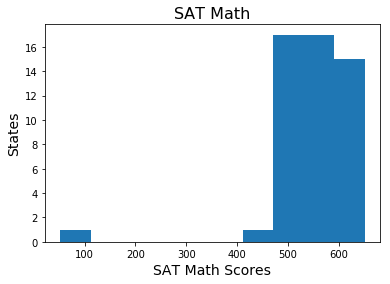

In [398]:
plt.hist(result['Math_SAT'])
plt.title("SAT Math", fontsize=16)
plt.xlabel("SAT Math Scores", fontsize=14)
plt.ylabel("States",fontsize=14)

plt.show()


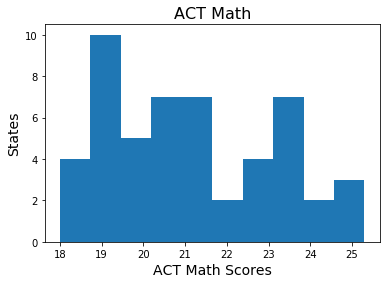

In [399]:
plt.hist(result['Math_ACT'])
plt.title("ACT Math", fontsize=16)
plt.xlabel("ACT Math Scores", fontsize=14)
plt.ylabel("States",fontsize=14)
plt.show()

##### 18. Plot the Verbal distributions from both data sets.

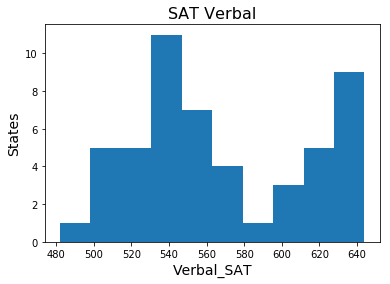

In [401]:
plt.hist(result['Verbal_SAT'])
plt.title("SAT Verbal", fontsize=16)
plt.xlabel("Verbal_SAT", fontsize=14)
plt.ylabel("States",fontsize=14)
plt.show()

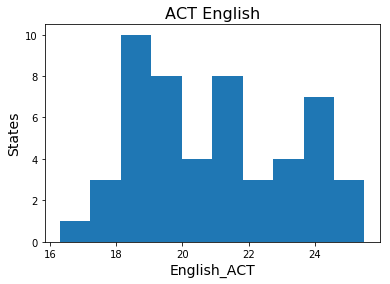

In [405]:
plt.hist(result['English_ACT'])
plt.title("ACT English", fontsize=16)
plt.xlabel("English_ACT", fontsize=14)
plt.ylabel("States",fontsize=14)
plt.show()

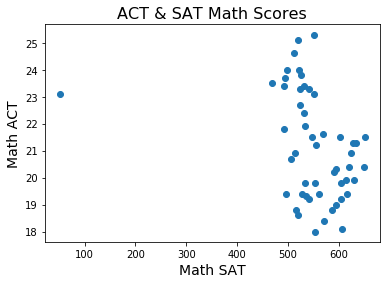

In [412]:
plt.scatter(result['Math_SAT'], result['Math_ACT']) 
plt.title("ACT & SAT Math Scores", fontsize=16)
plt.xlabel("Math SAT", fontsize=14)
plt.ylabel("Math ACT",fontsize=14)
plt.show()


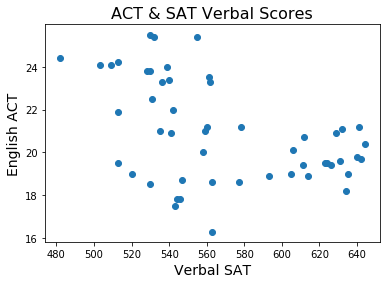

In [413]:
plt.scatter(result['Verbal_SAT'], result['English_ACT'])
plt.title("ACT & SAT Verbal Scores", fontsize=16)
plt.xlabel("Verbal SAT", fontsize=14)
plt.ylabel("English ACT",fontsize=14)
plt.show()

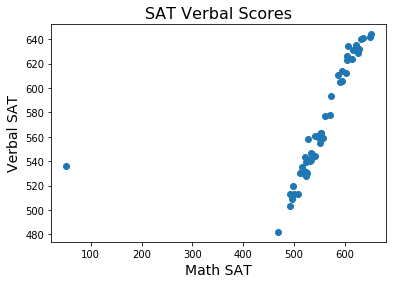

In [411]:
plt.scatter(result['Math_SAT'], result['Verbal_SAT'])#, result['Verbal_SAT'], result['English_ACT'])
plt.title("SAT Math & Verbal Scores", fontsize=16)
plt.xlabel("Math SAT", fontsize=14)
plt.ylabel("Verbal SAT",fontsize=14)
plt.show()

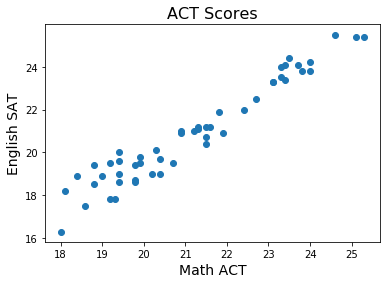

In [414]:
plt.scatter(result['Math_ACT'], result['English_ACT'])
plt.title("ACT Scores", fontsize=16)
plt.xlabel("Math ACT", fontsize=14)
plt.ylabel("English SAT",fontsize=14)
plt.show()

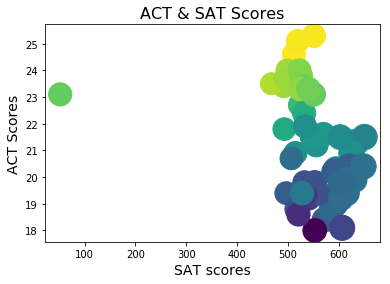

In [416]:
plt.scatter(result['Math_SAT'], result['Math_ACT'], result['Verbal_SAT'], result['English_ACT'])
plt.title("ACT & SAT Scores", fontsize=16)
plt.xlabel("SAT scores", fontsize=14)
plt.ylabel("ACT Scores",fontsize=14)
plt.show()


In both tests, as math scores go up, so do the verbal scores.

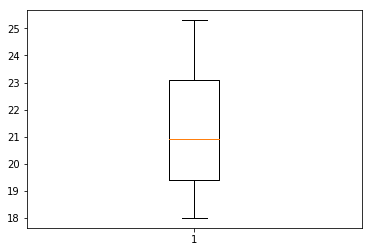

In [249]:
plt.boxplot(result['Math_ACT'])
plt.show()

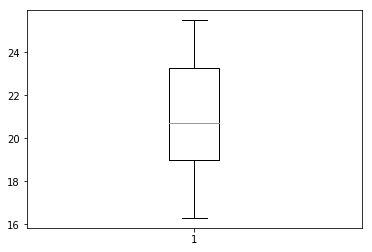

In [67]:
plt.boxplot(result['English_ACT'])
plt.show()

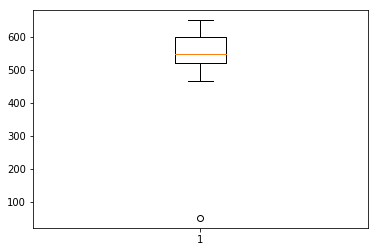

In [68]:
plt.boxplot(result['Math_SAT'])
plt.show()

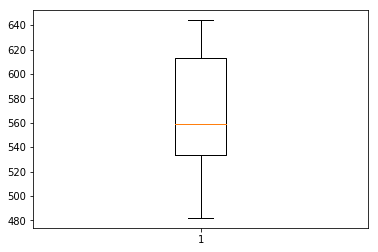

In [69]:
plt.boxplot(result['Verbal_SAT'])
plt.show()

## Step 4: Descriptive and Inferential Statistics

##### 24. Distribution Summaries

SAT:
Math(548, 548, 554), 85, slightly left skewed
Verbal(569, 559, 521) 46, right skewed
ACT:
Math(21,21,19.4) 2, slightly right skewed
English(21,21,19.9) 2.4, slightly right skewed
Reading(22,22,20.5) 2.1, slightly right skewed
Science(21,21,21) 3.2, normal

In [85]:
result.Science_ACT.median()

21.3

In [86]:
result.Science_ACT.value_counts()

20.6    3
20.5    3
20.9    3
22.0    3
19.9    2
21.3    2
23.5    2
19.6    2
21.7    2
19.3    2
23.2    2
22.1    2
19.4    2
24.6    1
18.2    1
22.3    1
21.5    1
20.0    1
21.6    1
24.7    1
2.3     1
23.8    1
23.3    1
24.9    1
23.9    1
20.1    1
22.2    1
19.8    1
18.8    1
23.4    1
18.9    1
23.6    1
23.7    1
19.5    1
Name: Science_ACT, dtype: int64

In [83]:
result.Reading_ACT.median()

21.8

In [84]:
result.Reading_ACT.value_counts()

20.1    3
20.8    3
21.0    2
21.2    2
24.2    2
24.6    2
19.7    2
24.8    2
20.5    2
22.3    2
20.4    2
19.8    1
26.0    1
24.5    1
23.0    1
22.5    1
24.7    1
25.6    1
20.6    1
21.8    1
22.0    1
18.1    1
19.1    1
24.9    1
21.1    1
22.6    1
21.9    1
18.8    1
22.4    1
19.6    1
21.6    1
24.4    1
24.1    1
23.1    1
19.2    1
22.1    1
23.2    1
25.9    1
Name: Reading_ACT, dtype: int64

In [82]:
result.English_ACT.median()

20.7

In [81]:
result.English_ACT.value_counts()

19.0    3
21.2    3
19.5    3
23.3    2
21.0    2
20.9    2
17.8    2
18.9    2
18.6    2
24.1    2
25.4    2
23.8    2
19.4    2
20.7    1
17.5    1
23.5    1
18.5    1
24.0    1
19.8    1
22.0    1
25.5    1
20.0    1
24.4    1
19.7    1
16.3    1
18.2    1
21.9    1
19.6    1
20.4    1
21.1    1
18.7    1
23.4    1
20.1    1
24.2    1
22.5    1
Name: English_ACT, dtype: int64

In [77]:
result.Math_ACT.median()

20.9

In [382]:
result.Math_ACT.value_counts()

19.4    4
19.8    3
21.5    3
20.4    2
21.3    2
18.8    2
23.3    2
19.9    2
20.9    2
19.2    2
23.1    2
24.0    2
23.4    2
21.8    1
18.4    1
23.8    1
20.7    1
18.0    1
18.1    1
19.3    1
23.5    1
20.2    1
24.6    1
21.6    1
23.7    1
22.4    1
25.1    1
22.7    1
25.3    1
18.6    1
21.9    1
21.2    1
20.3    1
19.0    1
Name: Math_ACT, dtype: int64

In [75]:
result.Verbal_SAT.median()

559.0

In [76]:
result.Verbal_SAT.value_counts()

513.0    3
530.0    3
563.0    2
626.0    1
555.0    1
536.0    1
611.0    1
631.0    1
632.0    1
641.0    1
542.0    1
559.0    1
535.0    1
544.0    1
642.0    1
520.0    1
482.0    1
503.0    1
606.0    1
531.0    1
614.0    1
547.0    1
509.0    1
644.0    1
634.0    1
640.0    1
558.0    1
541.0    1
561.0    1
562.0    1
624.0    1
623.0    1
612.0    1
543.0    1
539.0    1
540.0    1
560.0    1
578.0    1
635.0    1
546.0    1
528.0    1
577.0    1
532.0    1
629.0    1
605.0    1
593.0    1
Name: Verbal_SAT, dtype: int64

In [73]:
result.Math_SAT.median()

548.0

In [74]:
result.Math_SAT.value_counts()

553.0    2
604.0    2
524.0    2
551.0    2
541.0    2
649.0    1
493.0    1
499.0    1
586.0    1
616.0    1
628.0    1
635.0    1
532.0    1
556.0    1
497.0    1
515.0    1
468.0    1
492.0    1
512.0    1
595.0    1
594.0    1
533.0    1
52.0     1
495.0    1
528.0    1
651.0    1
534.0    1
614.0    1
507.0    1
603.0    1
521.0    1
531.0    1
548.0    1
517.0    1
570.0    1
621.0    1
535.0    1
523.0    1
561.0    1
526.0    1
520.0    1
625.0    1
591.0    1
631.0    1
607.0    1
572.0    1
Name: Math_SAT, dtype: int64

In [353]:
result.describe()

,Participation_SAT,Verbal_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,547.627451,1126.098039,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608
std,35.276632,45.666901,84.909119,92.494812,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695
min,2.000000,482.000000,52.000000,950.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,4.000000,533.500000,522.000000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


##### Hypothesis test comparing SAT and ACT participation rates.  $\alpha = 0.05$

Ho SAT participation = ACT participation
Ha SAT participation != ACT participation

In [373]:
A= result.Participation_SAT
B= result.Participation_ACT 

In [374]:
A

0       5.0
1      38.0
2      30.0
3       3.0
4      53.0
5      11.0
6     100.0
7     100.0
8     100.0
9      83.0
10     61.0
11     55.0
12     93.0
13      9.0
14     63.0
15      2.0
16      4.0
17      4.0
18      4.0
19     95.0
20     69.0
21     76.0
22    100.0
23      3.0
24      2.0
25      3.0
26     10.0
27      3.0
28     26.0
29     96.0
30     70.0
31     11.0
32     67.0
33     49.0
34      2.0
35     12.0
36      7.0
37     43.0
38     65.0
39     71.0
40     50.0
41      3.0
42      5.0
43     62.0
44      3.0
45     60.0
46     65.0
47     64.0
48     14.0
49      3.0
50      3.0
Name: Participation_SAT, dtype: float64

In [375]:
 stats.ttest_ind(A, B)

Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024134203698662353)

Based on the low p value (<.05) We reject the null hypothesis.

##### Generating 95% confidence intervals for SAT and ACT participation rates.

In [384]:
A= result.Participation_SAT
B= result.Participation_ACT
stats.t.interval(0.95, len(A) -1, 
                 loc = np.mean(A), 
                 scale = np.std(A, ddof =1))

(-31.051279537380644, 110.65912267463554)

In [385]:
np.mean(A)

39.80392156862745

In [386]:
np.mean(B)

65.25490196078431

In [381]:
A= result.Participation_SAT
B= result.Participation_ACT
stats.t.interval(0.95, len(B) -1, 
                 loc = np.mean(B), 
                 scale = np.std(B, ddof =1))

(0.69812093585757395, 129.81168298571106)